# Rozdzielczość transformaty Fouriera

Mamy przebieg złożony: suma dwu przebiegów sinusoidalnych o bliskich częstościach. W poniższym przykładzie to przebiegi o częstościach 1 Hz i 1.1 Hz. Amplitudy są różne.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [2]:
freq1 = 1   # Hz - liczba okresów na sekundę
freq2 = 1.1 # HZ
amplitude1 = 3
amplitude2 = 5
time_to_plot = 50 # czas (długość danych wejściowych)
sample_rate = 10 # liczba próbek na sekundę
num_samples = sample_rate * time_to_plot

t = np.linspace(0, time_to_plot, num_samples)
signal = [amplitude1 * np.sin(freq1 * i * 2*np.pi) + amplitude2 * np.sin(freq2 * i * 2*np.pi) for i in t] 

Przebieg wygląda jakoś tak:

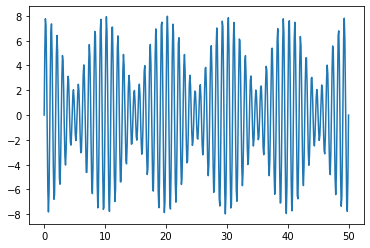

In [3]:
plt.plot(t, signal);

Natomiast jego transformata tak jak poniżej.

In [4]:
fft_output = np.fft.rfft(signal)
magnitude_only = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

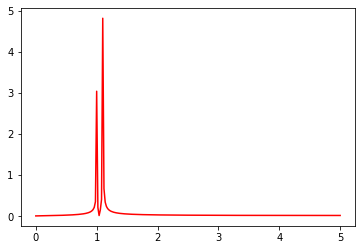

In [5]:
plt.plot(frequencies, magnitude_only, 'r');
#plt.xlim(0.7, 1.5);

Do dyspozycji mamy tylko dwa parametry: czestość próbkowania sygnału oraz czas rejestracji sygnału. **Należy, manipulując nimi, doprowadzić do takiej sytuacji żeby zobaczyć dwa „paski” (czy może raczej szczyty) odpowiadające częstościom sygnałów.**